In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# nombres de las columnas
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# cargar el conjunto de datos
iris_data_show = pd.read_csv(url, names=names )

# mostrar los primeros 10 registros del conjunto de datos
print(iris_data_show.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data = load_iris()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

# Convert the data into PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

input_shape = X_train.shape[1]

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.softmax(self.fc3(x), dim=1)
        return x

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
num_epochs = 200
batch_size = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Obtener un batch de datos de entrenamiento y convertirlos a tensores de PyTorch
        inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)

        # Reinicializar los gradientes del optimizador y calcular los logits
        optimizer.zero_grad()
        outputs = model(inputs)

        # Calcular la pérdida y los gradientes
        loss = criterion(outputs, targets)
        loss.backward()

        # Actualizar los parámetros del modelo
        optimizer.step()

    # Calcular las pérdidas de entrenamiento y prueba al final de cada época
    train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
    train_losses.append(train_loss.item())

    test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
    test_losses.append(test_loss.item())

    # Calcular la precisión de entrenamiento y prueba al final de cada época
    train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Imprimir las pérdidas de entrenamiento y prueba y accuracies al final de cada época
    print(f"Epoch {epoch+1}, train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, train accuracy: {train_accuracy:.4f}, test accuracy: {test_accuracy:.4f}")


<ipython-input-2-be63c1036618>:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-2-be63c1036618>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To c

Epoch 1, train loss: 1.0914, test loss: 1.0716, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 2, train loss: 1.0901, test loss: 1.0703, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 3, train loss: 1.0889, test loss: 1.0690, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 4, train loss: 1.0879, test loss: 1.0678, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 5, train loss: 1.0869, test loss: 1.0668, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 6, train loss: 1.0860, test loss: 1.0657, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 7, train loss: 1.0851, test loss: 1.0648, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 8, train loss: 1.0843, test loss: 1.0639, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 9, train loss: 1.0835, test loss: 1.0631, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 10, train loss: 1.0828, test loss: 1.0623, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 11, train loss: 1.0821, test loss: 1.0616, train accu

<ipython-input-2-be63c1036618>:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-2-be63c1036618>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To c

Epoch 18, train loss: 1.0778, test loss: 1.0570, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 19, train loss: 1.0772, test loss: 1.0564, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 20, train loss: 1.0765, test loss: 1.0557, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 21, train loss: 1.0758, test loss: 1.0549, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 22, train loss: 1.0750, test loss: 1.0542, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 23, train loss: 1.0743, test loss: 1.0534, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 24, train loss: 1.0736, test loss: 1.0526, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 25, train loss: 1.0728, test loss: 1.0519, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 26, train loss: 1.0721, test loss: 1.0512, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 27, train loss: 1.0713, test loss: 1.0504, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 28, train loss: 1.0705, test loss: 1.0497, t

<ipython-input-2-be63c1036618>:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-2-be63c1036618>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To c

Epoch 32, train loss: 1.0674, test loss: 1.0467, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 33, train loss: 1.0666, test loss: 1.0459, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 34, train loss: 1.0657, test loss: 1.0451, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 35, train loss: 1.0649, test loss: 1.0443, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 36, train loss: 1.0640, test loss: 1.0434, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 37, train loss: 1.0631, test loss: 1.0426, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 38, train loss: 1.0622, test loss: 1.0417, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 39, train loss: 1.0613, test loss: 1.0408, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 40, train loss: 1.0603, test loss: 1.0399, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 41, train loss: 1.0594, test loss: 1.0390, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 42, train loss: 1.0584, test loss: 1.0380, t

<ipython-input-2-be63c1036618>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1036618>:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-2-be63c1036618>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it i

Epoch 47, train loss: 1.0533, test loss: 1.0330, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 48, train loss: 1.0522, test loss: 1.0320, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 49, train loss: 1.0511, test loss: 1.0309, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 50, train loss: 1.0500, test loss: 1.0299, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 51, train loss: 1.0488, test loss: 1.0287, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 52, train loss: 1.0477, test loss: 1.0276, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 53, train loss: 1.0465, test loss: 1.0264, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 54, train loss: 1.0454, test loss: 1.0252, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 55, train loss: 1.0442, test loss: 1.0240, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 56, train loss: 1.0430, test loss: 1.0227, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 57, train loss: 1.0418, test loss: 1.0214, t

<ipython-input-2-be63c1036618>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1036618>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1

Epoch 61, train loss: 1.0367, test loss: 1.0161, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 62, train loss: 1.0353, test loss: 1.0147, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 63, train loss: 1.0339, test loss: 1.0132, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 64, train loss: 1.0325, test loss: 1.0118, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 65, train loss: 1.0311, test loss: 1.0102, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 66, train loss: 1.0296, test loss: 1.0087, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 67, train loss: 1.0280, test loss: 1.0071, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 68, train loss: 1.0264, test loss: 1.0054, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 69, train loss: 1.0248, test loss: 1.0037, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 70, train loss: 1.0231, test loss: 1.0020, train accuracy: 0.3250, test accuracy: 0.3667
Epoch 71, train loss: 1.0214, test loss: 1.0002, t

<ipython-input-2-be63c1036618>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1036618>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1

Epoch 76, train loss: 1.0121, test loss: 0.9906, train accuracy: 0.5833, test accuracy: 0.4667
Epoch 77, train loss: 1.0101, test loss: 0.9886, train accuracy: 0.5917, test accuracy: 0.5333
Epoch 78, train loss: 1.0080, test loss: 0.9865, train accuracy: 0.6000, test accuracy: 0.6333
Epoch 79, train loss: 1.0058, test loss: 0.9843, train accuracy: 0.6167, test accuracy: 0.7000
Epoch 80, train loss: 1.0036, test loss: 0.9821, train accuracy: 0.6250, test accuracy: 0.7000
Epoch 81, train loss: 1.0012, test loss: 0.9797, train accuracy: 0.6417, test accuracy: 0.7000
Epoch 82, train loss: 0.9988, test loss: 0.9772, train accuracy: 0.6500, test accuracy: 0.7000
Epoch 83, train loss: 0.9963, test loss: 0.9747, train accuracy: 0.6500, test accuracy: 0.7000
Epoch 84, train loss: 0.9937, test loss: 0.9721, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 85, train loss: 0.9910, test loss: 0.9693, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 86, train loss: 0.9881, test loss: 0.9665, t

<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)

Epoch 94, train loss: 0.9618, test loss: 0.9401, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 95, train loss: 0.9582, test loss: 0.9364, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 96, train loss: 0.9544, test loss: 0.9326, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 97, train loss: 0.9507, test loss: 0.9288, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 98, train loss: 0.9469, test loss: 0.9249, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 99, train loss: 0.9430, test loss: 0.9210, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 100, train loss: 0.9392, test loss: 0.9171, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 101, train loss: 0.9354, test loss: 0.9131, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 102, train loss: 0.9316, test loss: 0.9092, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 103, train loss: 0.9278, test loss: 0.9053, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 104, train loss: 0.9241, test loss: 0.90

<ipython-input-2-be63c1036618>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1036618>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1

Epoch 105, train loss: 0.9204, test loss: 0.8977, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 106, train loss: 0.9168, test loss: 0.8940, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 107, train loss: 0.9133, test loss: 0.8903, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 108, train loss: 0.9098, test loss: 0.8868, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 109, train loss: 0.9065, test loss: 0.8833, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 110, train loss: 0.9032, test loss: 0.8800, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 111, train loss: 0.9001, test loss: 0.8767, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 112, train loss: 0.8970, test loss: 0.8736, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 113, train loss: 0.8941, test loss: 0.8705, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 114, train loss: 0.8912, test loss: 0.8675, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 115, train loss: 0.8884, test loss

<ipython-input-2-be63c1036618>:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-2-be63c1036618>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To c

Epoch 116, train loss: 0.8857, test loss: 0.8619, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 117, train loss: 0.8830, test loss: 0.8593, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 118, train loss: 0.8805, test loss: 0.8567, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 119, train loss: 0.8780, test loss: 0.8542, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 120, train loss: 0.8755, test loss: 0.8518, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 121, train loss: 0.8731, test loss: 0.8494, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 122, train loss: 0.8707, test loss: 0.8471, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 123, train loss: 0.8684, test loss: 0.8449, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 124, train loss: 0.8661, test loss: 0.8427, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 125, train loss: 0.8639, test loss: 0.8405, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 126, train loss: 0.8617, test loss

<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1036618>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1036618>:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-2-be63c1036618>:51: UserWarning: To copy construct f

Epoch 133, train loss: 0.8470, test loss: 0.8249, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 134, train loss: 0.8449, test loss: 0.8231, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 135, train loss: 0.8429, test loss: 0.8213, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 136, train loss: 0.8409, test loss: 0.8195, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 137, train loss: 0.8389, test loss: 0.8177, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 138, train loss: 0.8369, test loss: 0.8160, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 139, train loss: 0.8349, test loss: 0.8142, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 140, train loss: 0.8330, test loss: 0.8125, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 141, train loss: 0.8310, test loss: 0.8108, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 142, train loss: 0.8290, test loss: 0.8091, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 143, train loss: 0.8270, test loss

<ipython-input-2-be63c1036618>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
<ipython-input-2-be63c1036618>:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-2-be63c1036618>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it i

Epoch 152, train loss: 0.8095, test loss: 0.7923, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 153, train loss: 0.8075, test loss: 0.7907, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 154, train loss: 0.8056, test loss: 0.7890, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 155, train loss: 0.8036, test loss: 0.7873, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 156, train loss: 0.8017, test loss: 0.7856, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 157, train loss: 0.7997, test loss: 0.7840, train accuracy: 0.6583, test accuracy: 0.7000
Epoch 158, train loss: 0.7978, test loss: 0.7823, train accuracy: 0.6667, test accuracy: 0.7000
Epoch 159, train loss: 0.7958, test loss: 0.7806, train accuracy: 0.6667, test accuracy: 0.7000
Epoch 160, train loss: 0.7939, test loss: 0.7789, train accuracy: 0.6833, test accuracy: 0.7000
Epoch 161, train loss: 0.7919, test loss: 0.7772, train accuracy: 0.6833, test accuracy: 0.7333
Epoch 162, train loss: 0.7899, test loss

<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)

Epoch 170, train loss: 0.7741, test loss: 0.7615, train accuracy: 0.8000, test accuracy: 0.8000
Epoch 171, train loss: 0.7721, test loss: 0.7598, train accuracy: 0.8083, test accuracy: 0.8000
Epoch 172, train loss: 0.7702, test loss: 0.7580, train accuracy: 0.8250, test accuracy: 0.8000
Epoch 173, train loss: 0.7682, test loss: 0.7562, train accuracy: 0.8417, test accuracy: 0.8000
Epoch 174, train loss: 0.7662, test loss: 0.7545, train accuracy: 0.8500, test accuracy: 0.8000
Epoch 175, train loss: 0.7642, test loss: 0.7527, train accuracy: 0.8583, test accuracy: 0.8000
Epoch 176, train loss: 0.7623, test loss: 0.7510, train accuracy: 0.8750, test accuracy: 0.8000
Epoch 177, train loss: 0.7603, test loss: 0.7492, train accuracy: 0.8750, test accuracy: 0.8000
Epoch 178, train loss: 0.7583, test loss: 0.7474, train accuracy: 0.8833, test accuracy: 0.8333
Epoch 179, train loss: 0.7563, test loss: 0.7457, train accuracy: 0.8833, test accuracy: 0.8667
Epoch 180, train loss: 0.7543, test loss

<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)

Epoch 184, train loss: 0.7466, test loss: 0.7371, train accuracy: 0.9167, test accuracy: 0.9000
Epoch 185, train loss: 0.7447, test loss: 0.7354, train accuracy: 0.9167, test accuracy: 0.9000
Epoch 186, train loss: 0.7428, test loss: 0.7337, train accuracy: 0.9250, test accuracy: 0.9000
Epoch 187, train loss: 0.7410, test loss: 0.7320, train accuracy: 0.9333, test accuracy: 0.9000
Epoch 188, train loss: 0.7391, test loss: 0.7303, train accuracy: 0.9333, test accuracy: 0.9000
Epoch 189, train loss: 0.7373, test loss: 0.7287, train accuracy: 0.9417, test accuracy: 0.9333
Epoch 190, train loss: 0.7355, test loss: 0.7271, train accuracy: 0.9417, test accuracy: 0.9333
Epoch 191, train loss: 0.7337, test loss: 0.7254, train accuracy: 0.9417, test accuracy: 0.9333
Epoch 192, train loss: 0.7319, test loss: 0.7238, train accuracy: 0.9417, test accuracy: 0.9333
Epoch 193, train loss: 0.7301, test loss: 0.7222, train accuracy: 0.9417, test accuracy: 0.9333
Epoch 194, train loss: 0.7283, test loss

<ipython-input-2-be63c1036618>:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-2-be63c1036618>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
<ipython-input-2-be63c1036618>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)

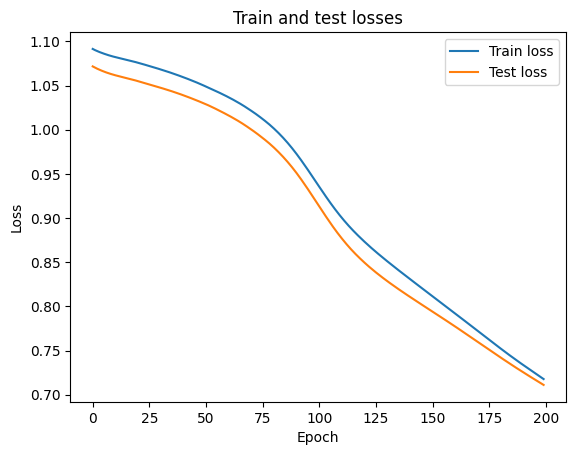

In [3]:
import matplotlib.pyplot as plt

# Visualizar train y test loss
plt.figure()
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.title('Train and test losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



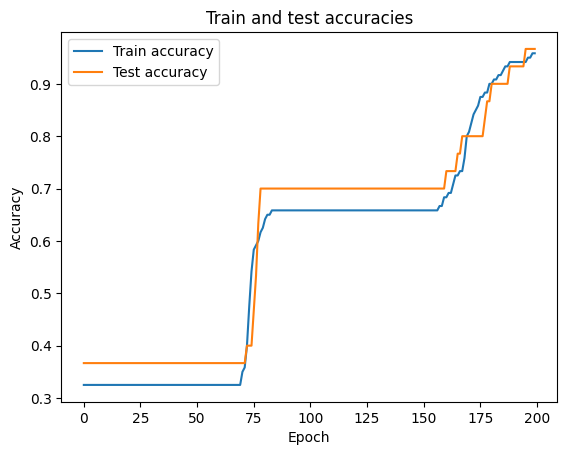

In [4]:
# Visualizar train y test accuracy
plt.figure()
plt.plot(train_accuracies, label='Train accuracy')
plt.plot(test_accuracies, label='Test accuracy')
plt.legend()
plt.title('Train and test accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

form 1 to make the matrix

<ipython-input-5-5fe2f0159d70>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_pred = model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy().argmax(axis=1)
<ipython-input-5-5fe2f0159d70>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().argmax(axis=1)


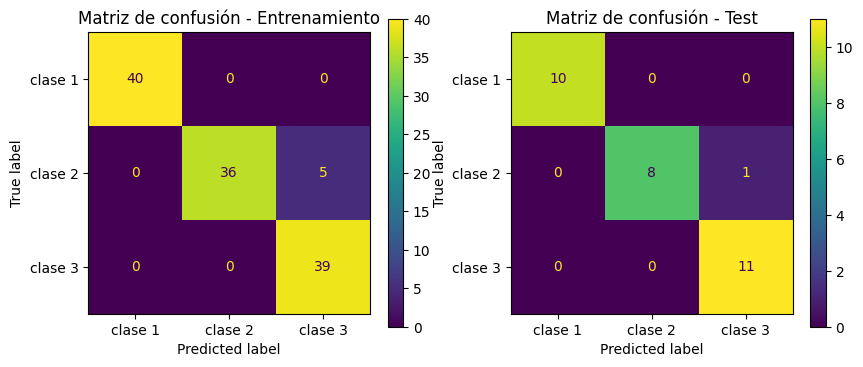

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predecir clases para datos de entrenamiento y test
y_train_pred = model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy().argmax(axis=1)
y_test_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().argmax(axis=1)

# calcular matrices de confusión
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# mostrar matrices de confusión
train_disp = ConfusionMatrixDisplay(train_cm, display_labels=['clase 1', 'clase 2', 'clase 3'])
test_disp = ConfusionMatrixDisplay(test_cm, display_labels=['clase 1', 'clase 2', 'clase 3'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
train_disp.plot(ax=ax1)
ax1.set(title='Matriz de confusión - Entrenamiento')
test_disp.plot(ax=ax2)
ax2.set(title='Matriz de confusión - Test')
plt.show()


form 2 to make the matrix

<ipython-input-6-cb1e7498d5e0>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(X_test, dtype=torch.float32))


confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


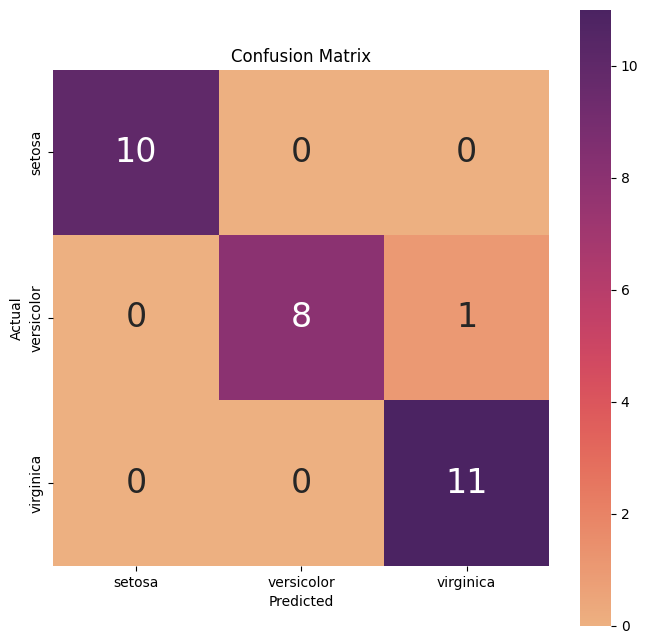

In [6]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las predicciones para el conjunto de prueba
y_pred = model(torch.tensor(X_test, dtype=torch.float32))
_, predicted = torch.max(y_pred, 1)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predicted.numpy())
print("confusion matrix:", cm, sep="\n")

# Dibujar la matriz de confusión utilizando seaborn
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=iris_data.target_names,
                 yticklabels=iris_data.target_names,
                 fmt='g', cmap='flare', annot_kws={"size": 24})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()
